In [4]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

beta = np.linspace(0.1, 100)

In [20]:
def SPO2023(beta_m, beta_crit=5, qshear=0.5, nR=1.5):
    gamp = 4/3
    zeta = 0.2

    betasq = beta_m * beta_m/beta_crit/beta_crit
    k_eff = 0.42 * sqrt(qshear * (4. - qshear)) / 2.
    gam_km = sqrt(sqrt((2. - qshear) * (2. - qshear) + k_eff * k_eff) - (k_eff * k_eff + (qshear - 2.)))
    Ps_over_Pa = 0.5 * (qshear * (2. + 2. * (2. - qshear) / (k_eff * k_eff + gam_km * gam_km)) - 2.)
    f = Ps_over_Pa + 35./(1 + pow(beta_m/15., -1.4))
    game = 4./3. + 0.13 * betasq / (1 + betasq)
    gamp_eff = 1. + 1. / ((1 + 2. * zeta / beta_m) / (gamp - 1.))
    trat = (gamp_eff - 1.) * (1. - (game - 1.) * (2. - nR)) * f / (game - 1.) / (1. - (gamp_eff - 1.) * (2. - nR) * (1. + 2. * zeta / beta_m))

    return trat

In [6]:
def beta_pre(beta, beta_crit, R_high, R_low):

    beta_sq = (beta/beta_crit) ** 2
    trat = R_high * beta_sq / (1 + beta_sq) + R_low / (1 + beta_sq)

    return trat

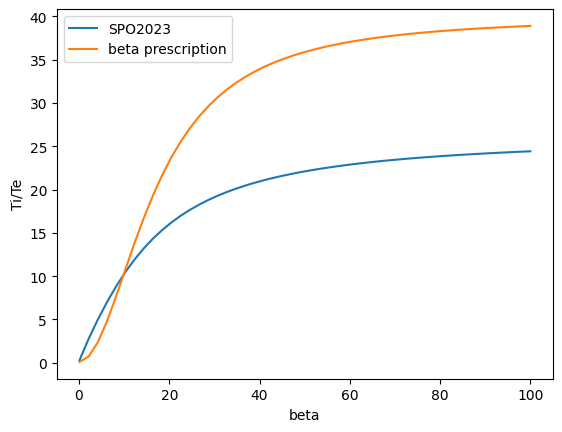

In [32]:
plt.plot(beta, SPO2023(beta, qshear=1.72654, nR=2), label="SPO2023")
plt.plot(beta, beta_pre(beta, 17, 40, 0.1), label="beta prescription")
plt.legend()
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel("beta")
plt.ylabel("Ti/Te")
plt.show()